The aim of this notebook is to extract all of the available non-target analysis data from the DSFP.
The output will be an n * m dataframe, where each row of the dataframe is a sample, and each column of the dataframe is a chemical. 
Each row column pair will return the peak area for that chemical in that sample. 
Additionally there will be columns specifying the matrix type, the collection name, and the lat/lon of the sample. 

This will take a long time, and the DSFP is prone to stop responding after too many requests. This should therefore be programmed in a way that is easy to run in batch, caches progress as it goes, and can be restarted halfway-through.

In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from io import StringIO
from pandas import json_normalize
import pykrev as pk 

In [2]:
#1 get collections
url="https://dsfp.norman-data.eu/api/1/metastore/schemas/dataset/all"
r = requests.get(url)
json = r.json()
dataframe = pd.DataFrame(json)
print(f"There are {len(dataframe['internal_id'].unique())} collections.")
print(f"There are {len(dataframe['participating_labs'].unique())} participating labs.")
dataframe

There are 81 collections.
There are 31 participating labs.


,uuid,internal_id,title,participating_labs
0,27df0a3e-3578-4a30-b9e4-1505f9da010d,333,LIFE APEX,"Trace Analysis Mass Spectrometry (TrAMS), Envi..."
1,7d20c4fb-64d0-4e29-bd51-331253cd5bc4,348,JDS4,"Trace Analysis Mass Spectrometry (TrAMS), Anal..."
2,980267da-34e0-5002-98c9-da2dcd3b6eec,1183,LIFE APEX GC,Trace Analysis Mass Spectrometry (TrAMS)
3,cf959f47-c2c0-5f37-bfc3-49b86b4d4b33,1184,Black-tailed godwit samples GC,Trace Analysis Mass Spectrometry (TrAMS)
4,379ec238-d44f-50e5-8d1f-74ff7a749463,1185,EODY,Trace Analysis Mass Spectrometry (TrAMS)
...,...,...,...,...
76,34610d3f-7021-42bd-abb4-16d6e6574fb9,2520,Milby2024,NILU
77,94a11e3c-bb75-4151-944d-ce2245b75f6e,2523,NTS of airborne organic substances in PDMS-foa...,NILU
78,e8ff3e9e-dd37-4817-b7c6-e18d942ae407,2611,NTS of airborne organic substances in PDMS-foa...,Environmental Cheminformatics - LCSB
79,cfd3a5a5-38f6-44a7-8f5a-1c9591d078f3,2623,NTS of airborne organic substances in PDMS-foa...,Trace Analysis Mass Spectrometry (TrAMS)


In [3]:
# 3 collection files
for iid in dataframe['internal_id'].unique():
    url = f"https://dsfp.norman-data.eu/data/{iid}/files.csv"
    r = requests.get(url)
    csv_file = StringIO(r.content.decode('utf-8'))
    files = pd.read_csv(csv_file)
    break

In [8]:
files['samples_file'][0]

'https://dsfp.norman-data.eu/data/333/samples-biota.csv'

In [5]:
#4 component lists
for cl in files['component_list']:
    url=cl
    r = requests.get(url)
    json = r.json()
    components = json_normalize(r.json(),record_path='fullscan')
    break


In [6]:
components

,mz,rt_minutes,max_intensity,peak_area,ion_type,ms_ms_available,proposed_identification_name,molecular_formula,smiles,norman_id,...,lc_retention_index,gc_retention_time_index,isotopes_mz,isotopes_int,isotopes_rt,adducts_mz,adducts_int,adducts_rt,hrmsms_mz,hrmsms_int
0,178.134013,3.344,1337976,9.049686e+06,-,Yes,,,,,...,167.648867,,[],[],[],[],[],[],"[45.05287, 56.04924, 57.04579, 58.065, 59.0492...","[256, 4868, 180, 1108, 296, 256, 3604, 2652, 1..."
1,218.211766,6.194,1295284,7.024619e+06,-,Yes,,,,,...,391.006480,,[],[],[],[],[],[],"[45.034, 45.06006, 51.99529, 52.01678, 53.0021...","[2684, 152, 280, 212, 544, 180, 280, 3496, 804..."
2,230.248500,10.561,1265332,7.399299e+06,-,Yes,,,,,...,733.253040,,[],[],[],[],[],[],"[45.03373, 45.05356, 51.99385, 53.00207, 53.03...","[2068, 1648, 332, 1284, 288, 236, 208, 7108, 2..."
3,357.250560,1.211,1263780,9.638896e+06,"M+H<->M+Na,M+H<->M+K,M+NH4<->M+H",Yes,,,,,...,0.483327,,"[357.25056029234, 358.253110338226]","[1263780, 478292]","[1.211, 1.194]","[274.27583864434, 340.222513460425, 379.231504...","[1263780, 1940, 15876, 3264, 59884, 10336, 486...","[10.361, 1.194, 1.211, 1.227, 1.227, 1.227, 1....","[55.01786, 55.05399, 56.04939, 57.05664, 58.06...","[1716, 420, 4040, 252, 18964, 256, 1316, 19920..."
4,274.275839,10.361,1263780,1.044229e+07,-,Yes,,,,,...,717.578822,,[],[],[],[],[],[],"[45.03421, 45.05281, 46.03663, 51.99532, 53.00...","[4664, 412, 216, 200, 956, 228, 164, 276, 4852..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8023,918.876377,1.411,308,2.000000e+03,-,No,,,,,...,16.157545,,[],[],[],[],[],[],[],[]
8024,874.885369,1.394,296,2.640000e+03,-,No,,,,,...,14.825237,,[],[],[],[],[],[],[],[]
8025,445.586140,5.894,296,2.343854e+03,-,No,,,,,...,367.495152,,[],[],[],[],[],[],[],[]
8026,718.869260,1.361,288,2.404000e+03,-,No,,,,,...,12.238991,,[],[],[],[],[],[],[],[]


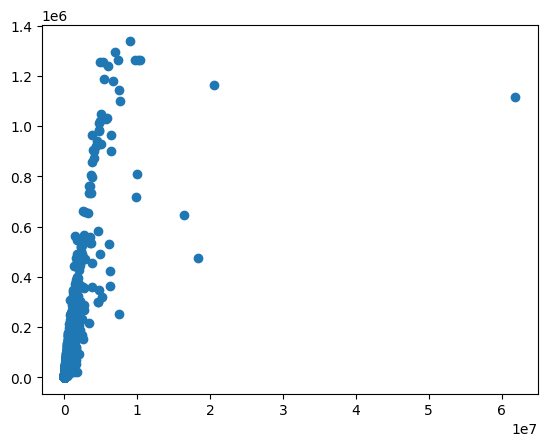

In [ ]:
#peak area and max intensity are generally correlated, as most peaks have the same shape. 
plt.scatter(components['peak_area'], components['max_intensity'])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='m/z', ylabel='Counts'>,
 (503.40739214712374, 512.769503370997, 221.11730279520216))

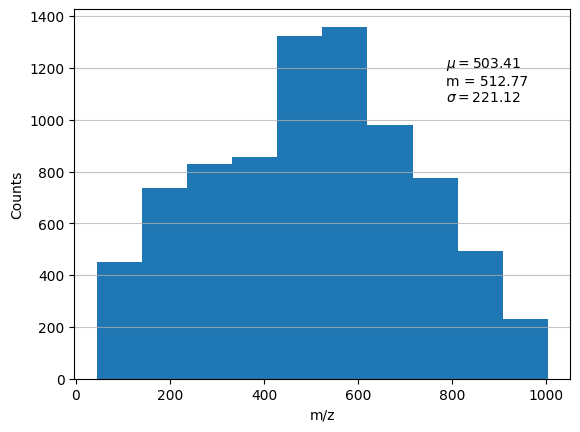

In [6]:
pk.mass_histogram(pk.msTuple(components['molecular_formula'],components['max_intensity'],components['mz']),method='mz', summary_statistics=True, density=False)

In [18]:
# I really need to rewrite this function in PyKrev
pk.mass_spectrum(pk.msTuple(components['molecular_formula'],components['max_intensity'],components['mz']),method='mz', stepSize=6)

: 